# AI Bank Churn Analysis

## Objective
Analyze customer churn patterns in a retail bank to identify:
- Key churn drivers
- High-risk customer segments
- Actionable business insights



In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)


In [2]:
df = pd.read_csv("Bank_Churn.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df.columns = df.columns.str.lower().str.strip()
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Basic Data Understanding

In [6]:
df.shape

(10000, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       10000 non-null  int64  
 1   surname          10000 non-null  object 
 2   creditscore      10000 non-null  int64  
 3   geography        10000 non-null  object 
 4   gender           10000 non-null  object 
 5   age              10000 non-null  int64  
 6   tenure           10000 non-null  int64  
 7   balance          10000 non-null  float64
 8   numofproducts    10000 non-null  int64  
 9   hascrcard        10000 non-null  int64  
 10  isactivemember   10000 non-null  int64  
 11  estimatedsalary  10000 non-null  float64
 12  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
df.describe()

,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Quality Summary
- Missing values: ___
- Duplicates: ___
- Initial action taken: ___


In [9]:
df.isnull().sum()

,0
customerid,0
surname,0
creditscore,0
geography,0
gender,0
age,0
tenure,0
balance,0
numofproducts,0
hascrcard,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [14]:
missing_per_column = df.isnull().sum()
missing_per_column

,0
customerid,0
surname,0
creditscore,0
geography,0
gender,0
age,0
tenure,0
balance,0
numofproducts,0
hascrcard,0


,0
customerid,0
surname,0
creditscore,0
geography,0
gender,0
age,0
tenure,0
balance,0
numofproducts,0
hascrcard,0


In [13]:
total_missing = missing_per_column.sum()
total_missing

np.int64(0)

In [15]:
total_duplicates = df.duplicated().sum()
total_duplicates

np.int64(0)

## GroupBy → Core Analyst Skill

In [16]:
df.groupby('geography')['exited'].mean().sort_values(ascending=False)

,exited
geography,
Germany,0.324432
Spain,0.166734
France,0.161548


In [17]:
df.groupby('geography').agg(
    total_customers=('customerid', 'count'),
    churn_rate=('exited', 'mean'),
    avg_balance=('balance', 'mean')
).sort_values(by='churn_rate', ascending=False)


,total_customers,churn_rate,avg_balance
geography,,,
Germany,2509,0.324432,119730.116134
Spain,2477,0.166734,61818.147763
France,5014,0.161548,62092.636516


In [19]:
df.groupby('age')['exited'].mean().sort_values(ascending=False)

,exited
age,
56,0.714286
52,0.627451
54,0.607143
55,0.585366
51,0.554622
...,...
81,0.000000
83,0.000000
85,0.000000


## Filter And Sorting Method

In [20]:
high_balance_churn = df[
    (df['balance'] > 100000) &
    (df['exited'] == 1)
]

high_balance_churn.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
35,15794171,Lombardo,475,France,Female,45,0,134264.04,1,1,0,27822.99,1


In [21]:
selected_countries = ['Germany', 'France']

df[df['geography'].isin(selected_countries)].head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


In [22]:
df.sort_values(
    by=['exited', 'balance'],
    ascending=[False, False]
).head(10)


,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
2092,15757408,Lo,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
3280,15715622,To Rot,583,France,Female,57,3,238387.56,1,0,1,147964.99,1
8733,15714241,Haddon,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1
6717,15586674,Shaw,663,Spain,Female,58,5,216109.88,1,0,1,74176.71,1
138,15594408,Chia,584,Spain,Female,48,2,213146.20,1,1,0,75161.25,1
520,15671256,Macartney,850,France,Female,35,1,211774.31,1,1,0,188574.12,1
7353,15736420,Macdonald,596,France,Male,21,4,210433.08,2,0,1,197297.77,1
720,15721658,Fleming,672,Spain,Female,56,2,209767.31,2,1,1,150694.42,1
8794,15578671,Webb,706,Spain,Female,29,1,209490.21,1,1,1,133267.69,1
5871,15709920,Burke,479,France,Female,33,2,208165.53,1,0,0,50774.81,1


In [23]:
df['balance_rank'] = df['balance'].rank(ascending=False)
df[['customerid', 'balance', 'balance_rank']].head()

,customerid,balance,balance_rank
0,15634602,0.00,8192.0
1,15647311,83807.86,5641.0
2,15619304,159660.80,589.0
3,15701354,0.00,8192.0
4,15737888,125510.82,2687.0


In [25]:
df[df['exited'] == 1].sort_values(by='balance', ascending=False).head(10)

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,balance_rank
2092,15757408,Lo,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1,1.0
3280,15715622,To Rot,583,France,Female,57,3,238387.56,1,0,1,147964.99,1,2.0
8733,15714241,Haddon,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1,3.0
6717,15586674,Shaw,663,Spain,Female,58,5,216109.88,1,0,1,74176.71,1,5.0
138,15594408,Chia,584,Spain,Female,48,2,213146.20,1,1,0,75161.25,1,7.0
520,15671256,Macartney,850,France,Female,35,1,211774.31,1,1,0,188574.12,1,12.0
7353,15736420,Macdonald,596,France,Male,21,4,210433.08,2,0,1,197297.77,1,13.0
720,15721658,Fleming,672,Spain,Female,56,2,209767.31,2,1,1,150694.42,1,14.0
8794,15578671,Webb,706,Spain,Female,29,1,209490.21,1,1,1,133267.69,1,15.0
5871,15709920,Burke,479,France,Female,33,2,208165.53,1,0,0,50774.81,1,16.0


In [26]:
def churn_risk(row):
    if row['age'] > 45 and row['balance'] > 80000:
        return 'High Risk'
    elif row['age'] > 35:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df['risk_segment'] = df.apply(churn_risk, axis=1)

In [27]:
df['risk_segment'].value_counts()

,count
risk_segment,
Medium Risk,4558
Low Risk,4153
High Risk,1289


## Visualization Using Pandas

<Axes: title={'center': 'Customer Churn Count'}, xlabel='exited'>

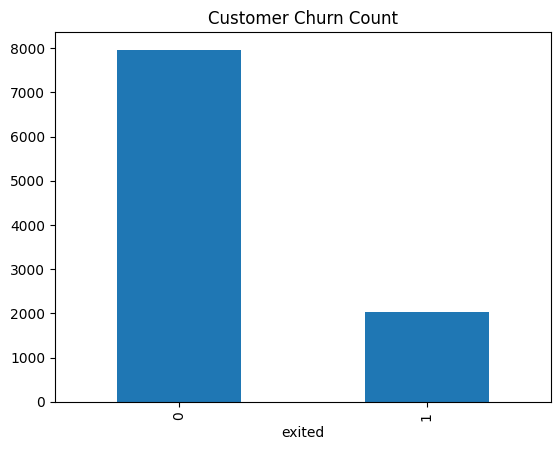

In [28]:
df['exited'].value_counts().plot(kind='bar', title='Customer Churn Count')

<Axes: title={'center': 'Churn Rate by Geography'}, xlabel='geography'>

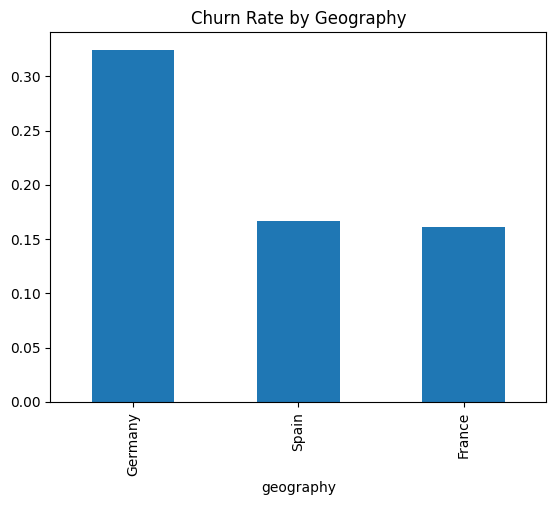

In [32]:
(
    df.groupby('geography')['exited']
      .mean()
      .sort_values(ascending=False)
      .plot(kind='bar', title='Churn Rate by Geography')
)


<Axes: title={'center': 'Age Distribution of Customers'}, ylabel='Frequency'>

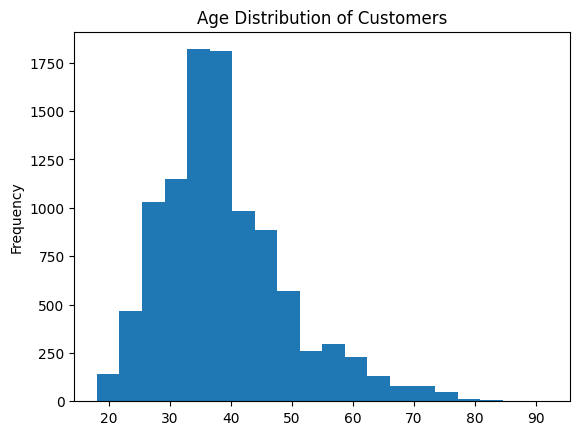

In [33]:
df['age'].plot(kind='hist', bins=20, title='Age Distribution of Customers')

<Axes: title={'center': 'balance'}, xlabel='exited'>

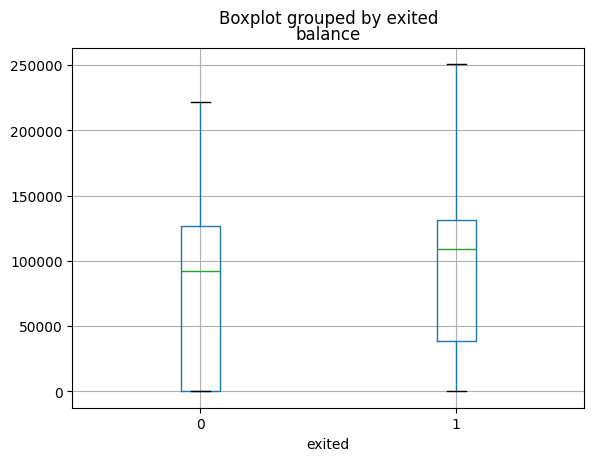

In [34]:
df.boxplot(column='balance', by='exited')

<Axes: title={'center': 'Average Balance by Age'}, xlabel='age'>

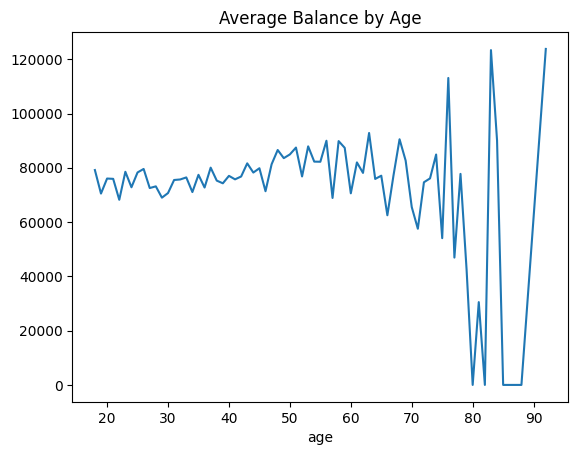

In [35]:
(
    df.groupby('age')['balance']
      .mean()
      .plot(kind='line', title='Average Balance by Age')
)


<Axes: title={'center': 'Gender vs Churn'}, xlabel='gender'>

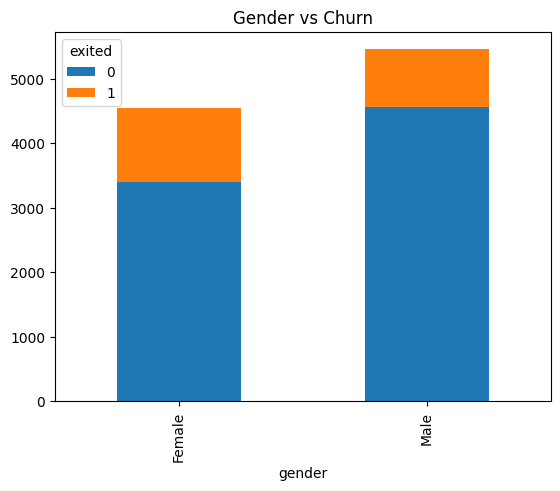

In [36]:
pd.crosstab(
    df['gender'],
    df['exited']
).plot(kind='bar', stacked=True, title='Gender vs Churn')


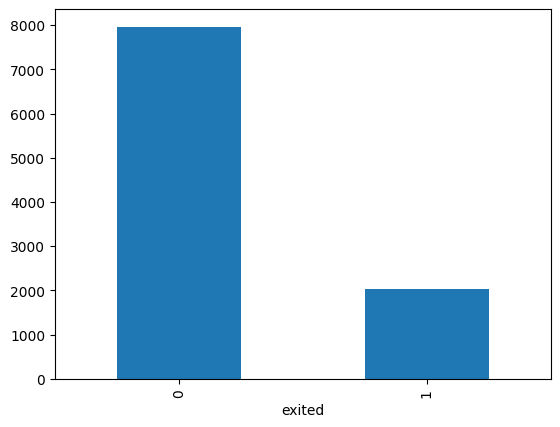

In [37]:
ax = df['exited'].value_counts().plot(kind='bar')
fig = ax.get_figure()
fig.savefig("churn_distribution.png")